# IMPORTING NECESSARY LIBRARIES

In [27]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram, circuit_drawer, plot_state_qsphere
from qiskit_aer import AerSimulator
from qiskit_aer.noise import pauli_error, NoiseModel, depolarizing_error
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import Statevector, Kraus, SuperOp
from qiskit_ibm_runtime import SamplerV2

# CIRCUIT CREATION

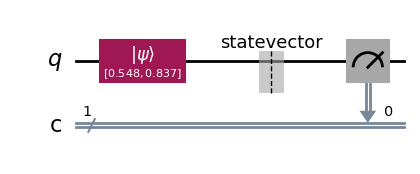

In [35]:
qc = QuantumCircuit(1,1)
alpha = np.sqrt(3/10)
beta = np.sqrt(7/10)
qc.initialize([alpha, beta], 0)
qc.save_statevector()
qc.measure(0,0)
qc.draw('mpl')

# THEORETICAL EXPECTATION VALUE

In [36]:
print(f"Expectation value (theoretically) : {alpha**2 - beta**2}")

Expectation value (theoretically) : -0.40000000000000013


# COUNTING FREQUENCIES USING SHOTS

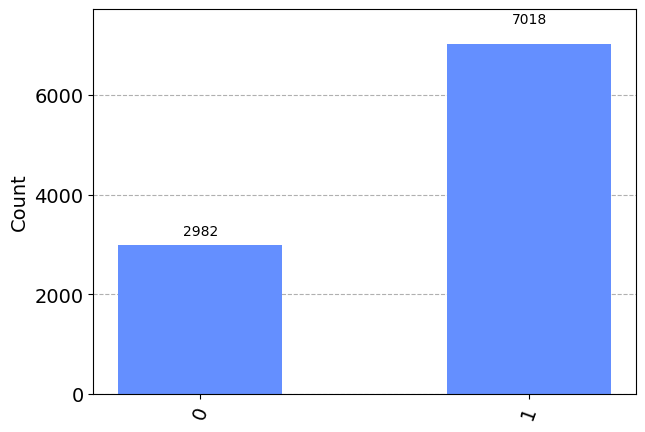

In [37]:
sim = AerSimulator()
result = sim.run(qc, shots=10000).result()
plot_histogram(result.get_counts(0))

# CALCULATING EXPECTATION VALUES

In [32]:
zero = result.get_counts(0)['0']
one = result.get_counts(0)['1']
expectation_value = (zero - one)/10000
print(f"Expectation Value : {expectation_value}")

Expectation Value : -0.4026


# STATEVECTOR

In [42]:
result.get_statevector().draw('latex')

<IPython.core.display.Latex object>

#### GIVEN STATE :

$$|\psi\rangle = \sqrt{\frac{3}{10}}|0\rangle + \sqrt{\frac{7}{10}}|1\rangle$$

#### EXPECTATION VALUE :

$$E = \langle\psi| Z |\psi\rangle$$

$$Z = |0\rangle\langle0| - |1\rangle\langle1|$$ 

$$E = (\sqrt{\frac{3}{10}}\langle0| + \sqrt{\frac{7}{10}}\langle1|)(|0\rangle\langle0| - |1\rangle\langle1|)(\sqrt{\frac{3}{10}}|0\rangle + \sqrt{\frac{7}{10}}|1\rangle)$$

$$E = (\sqrt{\frac{3}{10}}\langle0| + \sqrt{\frac{7}{10}}\langle1|)(\sqrt{\frac{3}{10}}|0\rangle\langle0|+\sqrt{\frac{7}{10}}|0\rangle\langle1|-\sqrt{\frac{3}{10}}|1\rangle\langle0|-\sqrt{\frac{7}{10}}|1\rangle\langle1|)$$

$$E = (\sqrt{\frac{3}{10}}|0\rangle + \sqrt{\frac{7}{10}}|1\rangle)(\sqrt{\frac{3}{10}}|0\rangle\langle0|) - (\sqrt{\frac{3}{10}}|0\rangle + \sqrt{\frac{7}{10}}|1\rangle)(\sqrt{\frac{7}{10}}|1\rangle\langle1|)$$

$$E=\frac{3}{10}\langle0|0\rangle\langle0|0\rangle - \frac{7}{10}\langle1|1\rangle\langle1|1\rangle$$

$$E =\frac{3}{10} - \frac{7}{10}$$ 

$$E = \frac{4}{10}$$

#### EXPECTATION VALUE :

$$ E = Tr(Z|\psi\rangle\langle\psi|)$$

#### EXPECTATION VALUE :

$$ E = Tr(|0\rangle\langle0|\psi\rangle\langle\psi|) - Tr(|1\rangle\langle1|\psi\rangle\langle\psi|)$$

$$E = \langle0|\psi|0\rangle - \langle1|\psi|1\rangle$$

$$E = prob(0) - prob(1)$$

# RUNNING ON BACKEND

In [4]:
from qiskit_ibm_runtime import QiskitRuntimeService
MY_TOKEN = '5d00a533cc46cc02eca65a5aa42cf20809da6d1d4cf9120d40131979ea9daaca37d51499493382e5b5ee5c56bae06bcc4b2c31b3e52e17f4abd3f7e7ac1412cd'
service = QiskitRuntimeService(channel='ibm_quantum', instance='ibm-q/open/main', token=MY_TOKEN)

In [5]:
service.backends()

[<IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>]

In [6]:
backend = service.get_backend('ibm_osaka')
sampler = SamplerV2(backend = backend)
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
q_circuit = pm.run(qc)

In [8]:
job = sampler.run([q_circuit])
job_id = job.job_id()

In [9]:
print(job_id)

ct6dj81wmw20008w61cg
